In [ ]:
import time
import matplotlib.pyplot as plt
import seaborn as sns

!pip install scanpy
#!pip install scvelo
#!pip install git+https://github.com/csgroen/scycle.git#egg=scycle
#!pip install  --no-dependencies  git+https://github.com/j-bac/elpigraph-python.git
# from elpigraph_ps_tools import *
#import elpigraph
import scanpy as sc
import anndata



import importlib
from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.8 MB/s 
     |████████████████████████████████| 9.4 MB 42.4 MB/s 
     |████████████████████████████████| 96 kB 4.1 MB/s 
     |████████████████████████████████| 88 kB 5.4 MB/s 
     |████████████████████████████████| 295 kB 52.8 MB/s 
     |████████████████████████████████| 965 kB 56.9 MB/s 
     |████████████████████████████████| 1.1 MB 58.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7ec9affb6fa44d4e177a8b8403eeb25dfcd03d143023c6001dced459b853e2f9
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=59513fe1655dd70b8093d09857a60745de6ebf5a5841e0a7197bb8cd2fab8a70
  Stored in directo

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.6.2
Uninstalling matplotlib-3.6.2:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.6.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.6.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [ ]:
path = '/content/drive/MyDrive/msdata.h5ad'
adata = sc.read(path)

In [ ]:
from scipy.sparse import hstack

In [ ]:
adata.obs

,tsne1,tsne2,cluster_original,sample,diagnosis,stage,age,sex,region,Capbatch,...,DMGM_UL,DMGM_DL,DMWM,n_genes,percent_mito,percent_ribo,n_counts,leiden,annot_level_2,annot_level_3
AAACCTGGTCCATGAT-1_5981_BA9,19.121044,-20.540960,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3795,0.005292,0.002951,9827.0,14,Glutamatergic,L5_6
AAACGGGAGTAGCCGA-1_5981_BA9,5.136135,-13.751351,4,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,2510,0.005038,0.004457,5161.0,2,Glutamatergic,L2_3
AAACGGGCATCGGTTA-1_5981_BA9,-28.210752,-20.764837,6A,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3779,0.018633,0.007034,8104.0,10,GABAergic,PV
AAACGGGTCCATGAAC-1_5981_BA9,29.946121,-15.725056,2,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,3376,0.016441,0.007046,7238.0,12,Glutamatergic,L4
AAAGATGCACGACTCG-1_5981_BA9,25.065271,-19.422704,3,5981_BA9,Control,Control,44,female,prefrontal,CAP7,...,NaN,NaN,NaN,4337,0.007789,0.002841,10913.0,21,Glutamatergic,L5_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTAAGA-1_MS200_A303,-5.428651,17.107557,5,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,857,0.003260,0.011410,1227.0,0,Oligodendrocyte,Oligodendrocyte
TTTGTCAGTTCGCGAC-1_MS200_A303,34.011235,-18.509118,2,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,5463,0.010610,0.018160,14703.0,9,Glutamatergic,L4
TTTGTCAGTTCTGGTA-1_MS200_A303,-16.622547,20.910561,8,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,1560,0.018838,0.003925,2548.0,1,Astrocyte,Astrocyte
TTTGTCATCCAAATGC-1_MS200_A303,-5.947137,-35.594686,16,MS200_A303,MS,Chronic inactive,44,female,prefrontal,CAP6,...,41.0,6.0,6.0,814,0.051595,0.019700,1066.0,8,Glutamatergic,PYR


In [ ]:
adata.var_names[adata.var.highly_variable]

Index(['AL645608.8', 'HES4', 'ISG15', 'AL645608.2', 'TTLL10', 'TNFRSF18',
       'TNFRSF4', 'CFAP74', 'AL139246.5', 'MEGF6',
       ...
       'TFF1', 'UBASH3A', 'RSPH1', 'CSTB', 'LINC01694', 'COL6A1', 'C21orf58',
       'S100B', 'MT-ND3', 'AC233755.2'],
      dtype='object', length=2000)

In [ ]:
hv_list = []
for i in range(35278):
  if adata.var.highly_variable[i]==True :
    hv_list.append(i)

In [ ]:
adata_h = adata[adata.obs.diagnosis == 'Control']
adata_d = adata[adata.obs.diagnosis == 'MS']

In [ ]:
adata_h_hv = adata_h.X[:,hv_list[0]]
adata_d_hv = adata_d.X[:,hv_list[0]]

In [ ]:
for i in range(1,2000):
  adata_h_hv = hstack((adata_h_hv, adata_h.X[:,hv_list[i]]))
  print(adata_h_hv.shape)

In [ ]:
for i in range(1,2000):
  adata_d_hv = hstack((adata_d_hv, adata_d.X[:,hv_list[i]]))
  print(adata_d_hv.shape)

In [ ]:
import numpy as np
d1 = adata_d_hv.toarray()

In [ ]:
d2 = adata_h_hv.toarray()

In [ ]:
!pip install contrastive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for contrastive: filename=contrastive-1.1.0-py3-none-any.whl size=6946 sha256=a3974b2dc1a1b254817d0cf147b89c0c6173bc8460f9c7a5ea8381322d1e9d19
  Stored in directory: /root/.cache/pip/wheels/c0/2f/8d/f0ee2e231586de792afdbedc07bd9e39f8ed2b7a4ac8f9508a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=25df4cefd300702ea1a7019ea1d4428ec86a17aa34038db9b41c72ed8f67d22e
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built contrastive sklearn


In [ ]:
target = d1 # diseased
backg = d2  # healthy

/usr/local/lib/python3.8/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


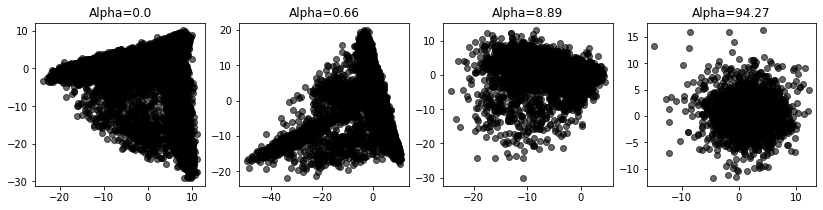

In [ ]:
from contrastive import CPCA

mdl = CPCA()
projected_data = mdl.fit_transform(target,backg,plot = True)

In [ ]:
target1 = d2 # HEALTHY
backg1 = d1  # DISEASED

/usr/local/lib/python3.8/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


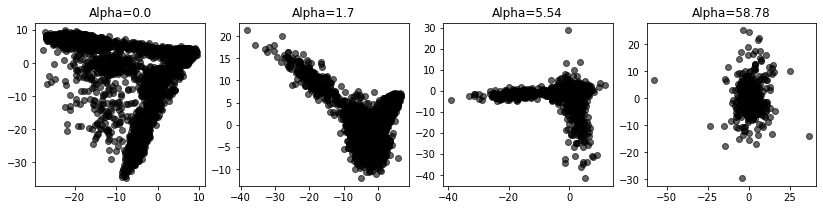

In [ ]:
from contrastive import CPCA

mdl = CPCA()
projected_data1 = mdl.fit_transform(target1,backg1,plot = True)

In [ ]:
from cpca_p import CPCA


mdl = CPCA()
projected_data, alphas , v_top = mdl.fit_transform(target,backg,return_alphas=True)



/content/cpca_p.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


(31516, 2000)
(17402, 2000)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)


In [ ]:
from cpca_p import CPCA


mdl = CPCA()
projected_data1, alphas1 , v_top1 = mdl.fit_transform(target1,backg1,return_alphas=True)


/content/cpca_p.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


(17402, 2000)
(31516, 2000)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)


In [ ]:
v_top1[1].shape

(2000, 2)

In [ ]:
ko = abs(v_top[1])
np.histogram(v_top[1])

(array([   6,   33,  147,  469, 1910, 1127,  219,   57,   30,    2]),
 array([-0.11006847, -0.08814493, -0.06622138, -0.04429784, -0.02237429,
        -0.00045075,  0.0214728 ,  0.04339635,  0.06531989,  0.08724344,
         0.10916698], dtype=float32))

NameError: ignored

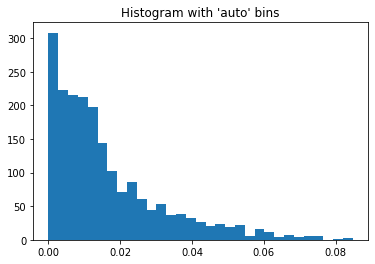

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(ko[:,0], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

NameError: ignored

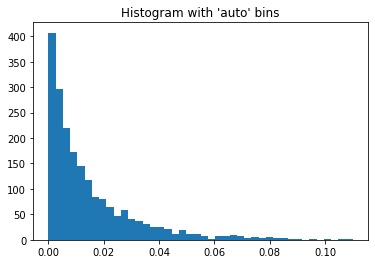

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(ko[:,1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [ ]:
v_top[1]

array([[-0.02200322,  0.01766195],
       [-0.00771876, -0.00236409],
       [-0.02786909,  0.00896208],
       ...,
       [-0.01234573, -0.00581474],
       [-0.00839101,  0.00343406],
       [-0.00236316,  0.00475495]], dtype=float32)

In [ ]:
v_top1[1]

array([[-0.00877285, -0.02242507],
       [ 0.01757837, -0.00535961],
       [ 0.01304983,  0.00951172],
       ...,
       [ 0.0030134 , -0.00914587],
       [ 0.01578364, -0.00755243],
       [ 0.00583867, -0.00807571]], dtype=float32)

In [ ]:
ko = v

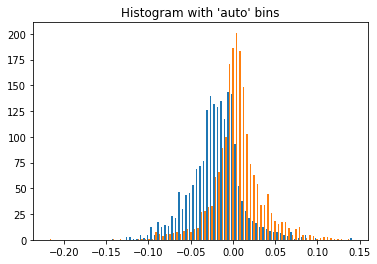

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(v_top[1] - v_top1[1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

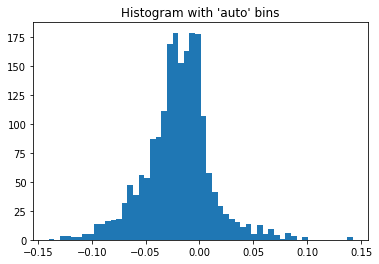

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(v_top[1][:,0] - v_top1[1][:,0], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

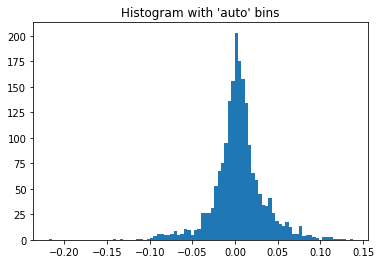

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(v_top[1][:,1] - v_top1[1][:,1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
# Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

# Asthma

In [ ]:
path = '/content/drive/MyDrive/asthma.h5ad'
adata = sc.read(path)

In [ ]:
adata.obs

,batch,clus,dataset,loc,tSNE_1,tSNE_2,sampleid,percent_mito,cell_subset,leiden,disease,annot_level_2,annot_level_3
4951STDY7487591GACGTGCGTAGTGAAT-0,0,Ciliated 1,Lung_epi,Airway,33.155996,4.419804,4951STDY7487591,0.009312,Ciliated 1,2,Healthy,Ciliated,Ciliated_1
4951STDY7487591TAAACCGGTAGCGCAA-0,0,Ciliated 1,Lung_epi,Airway,25.261054,9.093731,4951STDY7487591,0.008385,Ciliated 1,2,Healthy,Ciliated,Ciliated_1
CTTV027_RNAseq6949177_TATCAGGGTAAGGGAA-0,0,Ciliated 1,Lung_epi,Airway,22.476076,29.587953,CTTV027_RNAseq6949177_,0.006208,Ciliated 1,8,Healthy,Ciliated,Ciliated_1
4951STDY7487591TACTTACAGAGGTTGC-0,0,Club,Lung_epi,Airway,7.733250,22.486911,4951STDY7487591,0.006467,Club,8,Healthy,Club,Club
4951STDY7472266TGCACCTGTGTATGGG-0,0,Ciliated 2,Lung_epi,Airway,26.471470,-17.436907,4951STDY7472266,0.005334,Ciliated 2,2,Healthy,Ciliated,Ciliated_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTTV027_RNAseq7333558_CTTV027_RNAseq7333558CCTTCGACAAATTGCC-4,4,Luminal macrophages,Asthma_other,Asthma,-7.530124,-27.903879,CTTV027_RNAseq7333558_CTTV027_RNAseq7333558,0.007247,Luminal macrophages,22,Asthma,Macrophage,Macrophage_luminal
CTTV027_RNAseq7333558_CTTV027_RNAseq7333558CGATCGGTCGCCAAAT-4,4,Luminal macrophages,Asthma_other,Asthma,-8.607374,-29.359056,CTTV027_RNAseq7333558_CTTV027_RNAseq7333558,0.008482,Luminal macrophages,22,Asthma,Macrophage,Macrophage_luminal
CTTV027_RNAseq7333558_CTTV027_RNAseq7333558GCGCCAATCTGCTGCT-4,4,Luminal macrophages,Asthma_other,Asthma,-8.424184,-29.989269,CTTV027_RNAseq7333558_CTTV027_RNAseq7333558,0.011526,Luminal macrophages,22,Asthma,Macrophage,Macrophage_luminal
CTTV027_RNAseq7333559AAGCCGCGTCGCTTCT-4,4,Luminal macrophages,Asthma_other,Asthma,-9.439834,-29.938902,CTTV027_RNAseq7333559,0.008784,Luminal macrophages,22,Asthma,Macrophage,Macrophage_luminal


In [ ]:
adata.obs['disease'].unique()

['Healthy', 'Asthma']
Categories (2, object): ['Asthma', 'Healthy']

In [ ]:
adata

AnnData object with n_obs × n_vars = 67078 × 22645
    obs: 'batch', 'clus', 'dataset', 'loc', 'tSNE_1', 'tSNE_2', 'sampleid', 'percent_mito', 'cell_subset', 'leiden', 'disease', 'annot_level_2', 'annot_level_3'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'annot_level_2_colors', 'annot_level_3_colors', 'batch_colors', 'cell_subset_colors', 'dataset_colors', 'disease_colors', 'leiden', 'leiden_colors', 'loc_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
len(adata.var.highly_variable)

22645

In [ ]:
hv_list = []
for i in range(22645):
  if adata.var.highly_variable[i]==True :
    hv_list.append(i)

In [ ]:
adata_d = adata[adata.obs.disease == 'Asthma']
adata_h = adata[adata.obs.disease == 'Healthy']

In [ ]:
adata_h_hv = adata_h.X[:,hv_list[0]]
adata_d_hv = adata_d.X[:,hv_list[0]]

In [ ]:
for i in range(1,2000):
  adata_h_hv = hstack((adata_h_hv, adata_h.X[:,hv_list[i]]))
  print(adata_h_hv.shape)

In [ ]:
for i in range(1,2000):
  adata_d_hv = hstack((adata_d_hv, adata_d.X[:,hv_list[i]]))
  print(adata_d_hv.shape)

In [ ]:
import numpy as np
d1 = adata_d_hv.toarray()

In [ ]:
d2 = adata_h_hv.toarray()

In [ ]:
target = d1 # diseased
backg = d2  # healthy

/usr/local/lib/python3.8/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


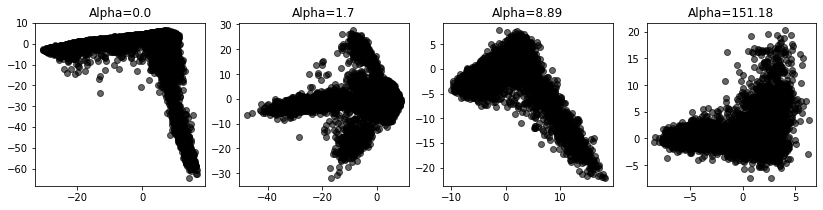

In [ ]:
from contrastive import CPCA

mdl = CPCA()
projected_data = mdl.fit_transform(target,backg,plot = True)

In [ ]:
target1 = d2 # diseased
backg1 = d1  # healthy

/usr/local/lib/python3.8/dist-packages/contrastive/__init__.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


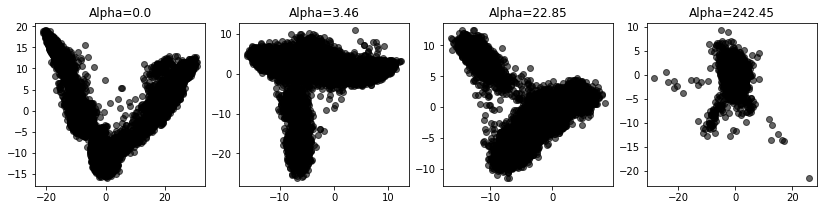

In [ ]:
from contrastive import CPCA

mdl = CPCA()
projected_data1 = mdl.fit_transform(target1,backg1,plot = True)

In [ ]:
from cpca_p import CPCA
mdl = CPCA()
projected_data, alphas , v_top = mdl.fit_transform(target,backg,return_alphas=True)

/content/cpca_p.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


(27213, 2000)
(39865, 2000)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)


In [ ]:
from cpca_p import CPCA
mdl = CPCA()
projected_data1, alphas1 , v_top1 = mdl.fit_transform(target1,backg1,return_alphas=True)


/content/cpca_p.py:40: RuntimeWarning: invalid value encountered in true_divide
  standardized_array =  (array-np.mean(array,axis=0)) / np.std(array,axis=0)


(39865, 2000)
(27213, 2000)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)
lelo
(2000, 2)


# Covid-19

In [ ]:
path = '/content/drive/MyDrive/covid.h5ad'
adata = sc.read(path)

/usr/local/lib/python3.8/dist-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/usr/local/lib/python3.8/dist-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [ ]:
adata.obs

,batch,sample,leiden,sample_new,group,disease,hasnCoV,cluster,celltype,severity,annot_level_2,annot_level_3
AAACCTGAGATATACG-C52,0,C52,0,HC2,HC,N,N,3.0,Macrophages,Unknown,Macrophages,Macrophages
AAACCTGAGCGTGAAC-C52,0,C52,3,HC2,HC,N,N,2.0,Macrophages,Unknown,Macrophages,Macrophages
AAACCTGAGCTACCTA-C52,0,C52,6,HC2,HC,N,N,3.0,Macrophages,Unknown,Macrophages,Macrophages
AAACCTGAGGCTAGCA-C52,0,C52,3,HC2,HC,N,N,11.0,Macrophages,Unknown,Macrophages,Macrophages
AAACCTGAGGGCTCTC-C52,0,C52,3,HC2,HC,N,N,11.0,Macrophages,Unknown,Macrophages,Macrophages
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATCCGTGG-C51,11,C51,0,HC1,HC,N,N,5.0,Macrophages,Unknown,Macrophages,Macrophages
TTTGTCAGTTAAAGTG-C51,11,C51,3,HC1,HC,N,N,4.0,Macrophages,Unknown,Macrophages,Macrophages
TTTGTCAGTTCCACGG-C51,11,C51,3,HC1,HC,N,N,5.0,Macrophages,Unknown,Macrophages,Macrophages
TTTGTCATCGCTGATA-C51,11,C51,0,HC1,HC,N,N,5.0,Macrophages,Unknown,Macrophages,Macrophages
